pressure at 25C: 0.04017072261877231
pressure at 30C: 0.06835226716963887
pressure at 35C: 0.0920831074617954
pressure at 40C: 0.1207019981504793
pressure at 45C: 0.16648084210388095
pressure at 50C: 0.25828191688134705
pressure at 55C: 0.36030361884683765


C:\Users\mbdxkps3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


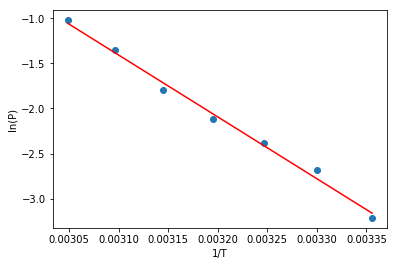

gradient: -6865.290954766599
intercept 19.875611454212017
r-squared: 0.9928930796427813
delHsub: 57.0780289979295
delSsub: 165.2458336303187
P298: 0.04232921981052737


In [2]:
##########################################################################################
#                                                                                        #
#    Script for calculating the solid state saturation vapour pressure at 298 K along    #
#    with the enthalpy and entropy of sublimation.                                       #
#    A generic version of this script can be found in the folder KEMS_python_scripts     #
#                                                                                        #
#    All Rights Reserved.                                                                #
#    This file is from the Measured-solid-state-and-sub-cooled-liquid-vapour-pressures   #
#    -of-nitroaromatics-using-KEMS-Data-Set                                              #
#                                                                                        #
#    This is an open source data set: you can redistribute it and/or modify it under     #
#    the terms of the GNU General Public License as published by the Free Software       #
#    Foundation, either version 3 of the License, or (at your option) any later          #
#    version.                                                                            #
#                                                                                        #
#    Measured-solid-state-and-sub-cooled-liquid-vapour-pressures-of-nitroaromatics-using #
#    -KEMS-Data-Set is distributed in the hope that it will be useful, but WITHOUT       #
#    ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS       #
#    FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more              #
#    details.                                                                            #
#                                                                                        #
#    You should have received a copy of the GNU General Public License along with        #
#    this data set.  If not, see <http://www.gnu.org/licenses/>.                         #
#                                                                                        #
##########################################################################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats # Import the required packages

def VP_function (R, B_R, S, B_S, T, ICSR, ICSS): # function to calculate pressure of sample at a given temperature
    MZ = R[:,0]                                  # mass charge ratio 
    RIC = R[:,1]                                 # reference ion current
    B_RIC = B_R[:,1]                               # background reading of the reference ion current
    CRIC = RIC - B_RIC                           # corrected reference ion current
    INT = np.trapz(CRIC,MZ)                      # integral of the reference ion current
    PR = np.exp(-8144.2/T+22.91)               # pressure of reference at given temperature. NOTE: -11058.97 and 29.54 are specific to malonic acid as a reference and will change depending on the reference used
    CF = PR/(INT/ICSR)                           # correction factor
    SIC = S[:,1]                                 # sample ion current
    B_SIC = B_S[:,1]                               # background reading of the sample ion current
    CSIC = SIC-B_SIC                             # corrected sample ion current
    SINT = np.trapz(CSIC,MZ)                     # integral of ther sample ion current
    PS = CF*(SINT/ICSS)                          # pressure of sample
    return PS

# R is reference run using the np.loadtxt to read in and skiprows to start at m/z41
# B_R is the background reading for R
# S is the sample run, B_S is the background of the sample
# T is the temperature of the run
# ICSR and ICSS are the ionisation cross sections of the reference and the sample respectively

T1 = 298 # temperature of run 1 
T2 = 303 # temperature of run 2 ect...
T3 = 308
T4 = 313
T5 = 318
T6 = 323
T7 = 328


PS25 = VP_function(np.loadtxt("peg-4_25c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_25c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T1, 36.17028, 27.76892)
PS30 = VP_function(np.loadtxt("peg-4_30c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_30c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T2, 36.17028, 27.76892)
PS35 = VP_function(np.loadtxt("peg-4_35c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_35c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T3, 36.17028, 27.76892)
PS40 = VP_function(np.loadtxt("peg-4_40c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_40c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T4, 36.17028, 27.76892)
PS45 = VP_function(np.loadtxt("peg-4_45c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_45c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T5, 36.17028, 27.76892)
PS50 = VP_function(np.loadtxt("peg-4_50c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_50c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T6, 36.17028, 27.76892)
PS55 = VP_function(np.loadtxt("peg-4_55c.asc", skiprows=2581), np.loadtxt("peg-4_gateopen.asc", skiprows=2581), np.loadtxt("peg-3_55c.asc", skiprows=2581), np.loadtxt("peg-3_gateopen.asc", skiprows=2581), T7, 36.17028, 27.76892)
# PS25 is pressure of sample at 25C using the VP_function function

print('pressure at 25C:', PS25) # prints the pressure at 25C
print('pressure at 30C:', PS30) # prints the pressure at 30C ect...
print('pressure at 35C:', PS35)
print('pressure at 40C:', PS40)
print('pressure at 45C:', PS45)
print('pressure at 50C:', PS50)
print('pressure at 55C:', PS55)

X =[1/T1, 1/T2, 1/T3, 1/T4, 1/T5, 1/T6, 1/T7] # creates vector of one over temperature
Y=[np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45), np.log(PS50), np.log(PS55)] # creates vector of the natural log of the pressure
slope, intercept, r_value, P_value, std_err = scipy.stats.linregress(X,Y) # gives slope, intercept, correlation coefficient, P value for statistical tests and standard error of the regression

x = np.array([1/T1, 1/T2, 1/T3, 1/T4, 1/T5, 1/T6, 1/T7]) # creates numpy array of one over temperature
y = np.array([np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45), np.log(PS50), np.log(PS55)]) # creates numpy array of the natural log of the pressure
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0] # m = gradient c =intercept
plt.plot(x, y, 'o') # plots scatter plot of 1/T vs ln(P)
plt.plot(x, m*x + c, 'r') # plots linear regression line 
plt.xlabel('1/T')
plt.ylabel('ln(P)')
plt.show() # gives graph with original points and linear regression line

print('gradient:', m) 
print('intercept', c)
print('r-squared:', r_value*r_value)

R =  8.314 # ideal gas constant
delHsub = R/1000*-m # calculate sublimation enthalpy
delSsub = R*c # calculate sublimation entropy
P298 = np.exp(-delHsub*1000/(R*298)+delSsub/R) # calculate P298 of sample

print('delHsub:', delHsub)
print('delSsub:', delSsub)
print('P298:', P298)